## "Week of Oct21" HW

**Q1.** Simple Linear Regression models the relationship between one predictor variable (xi) and one outcome variable (Yi). This is represented with the equation
$Yi = \beta_0 + \beta_1 xi + \epsilon$, where Y is the outcome variable, xi is the predictor variable, B0 the y-intercept, B1 the slope coefficient, and epsilon is the error term. The slope gives information about the steepness of the line and the effect of X on Y, the intercept gives information on where the line crosses the Y-axis at xi = 0, and the error term captures variability around the line. The model assumes that for each xi value, Yi is normally distributed around the predicted value B0 + B1xi.


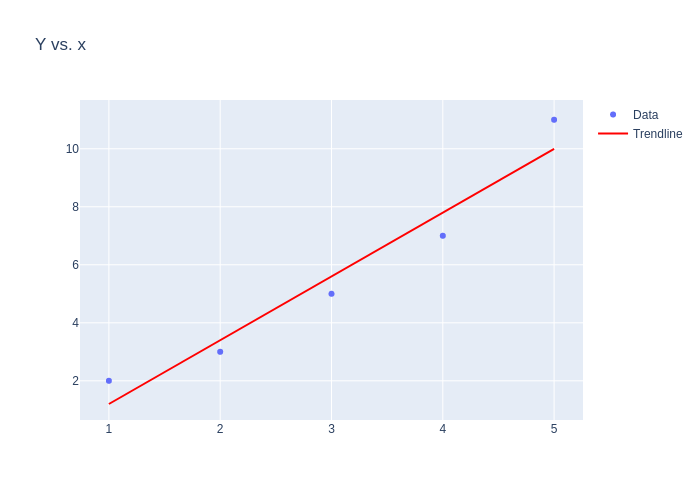

In [62]:
##Q1: Python Code to Demonstarte Simple Linear Regression

import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd  # Import pandas to create the DataFrame

# Create or load your DataFrame (replace with your actual data)
data = {'x': [1, 2, 3, 4, 5], 'Y': [2, 3, 5, 7, 11]}  # Example data
df = pd.DataFrame(data)  # This creates the df DataFrame

# Now proceed with your existing code
x = df['x']
Y = df['Y']
X = sm.add_constant(x)  # Adds a constant for the intercept term
model = sm.OLS(Y, X).fit()  # Fit OLS model
trendline = model.fittedvalues  # Get the fitted values (trendline)

# Create the scatter plot with plotly.graph_objects
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add trendline
fig.add_trace(go.Scatter(x=x, y=trendline, mode='lines', name='Trendline', line=dict(color='red')))

# Set title and show the figure
fig.update_layout(title='Y vs. x')
fig.show(renderer="png")


/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



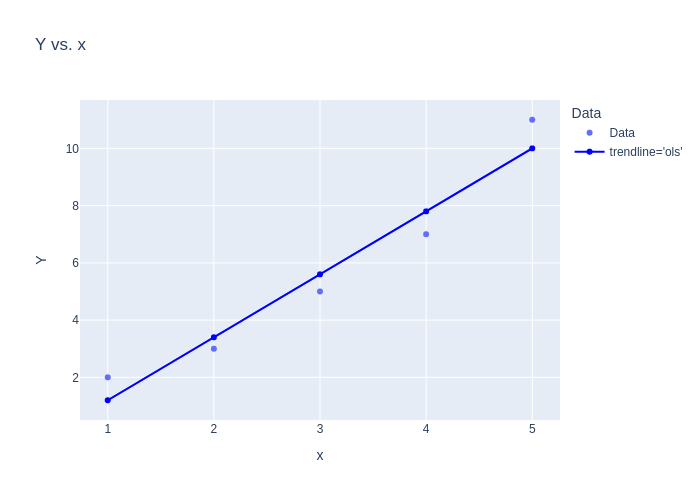

In [63]:
import statsmodels.formula.api as smf  # This library fits statistical models like linear regression and performs statistical analyses 
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) ##Specifies an ordinary least squares model where y is the dependent and x the independent variable 
fitted_model = model_data_specification.fit() ##fits the OLS regression model to the data, estimating parameters based on the provided dataset.

# what do each of the following provide?
fitted_model.summary()  # detailed summary of regression results, including coefficient estimates, standard errors, R-squared,p-values,etc.
fitted_model.summary().tables[1]  # extracts second table from the summary
fitted_model.params  # provides estimated coefficients of the fitted model
fitted_model.params.values  # values of estimated coefficients in an array format
fitted_model.rsquared  # provides the R^2 value.

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x') # creates scatter plot with x on horizontal axis, y on the vertical axis and adds a tendline using OLS regression
# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



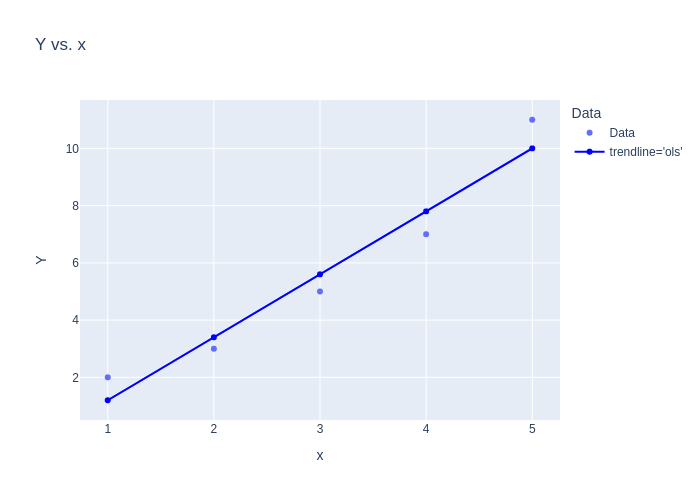

In [65]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# what are the following two steps doing?
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     51.86
Date:                Fri, 08 Nov 2024   Prob (F-statistic):            0.00552
Time:                        00:55:10   Log-Likelihood:                -5.6451
No. Observations:                   5   AIC:                             15.29
Df Residuals:                       3   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000      1.013     -0.987      0.3

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



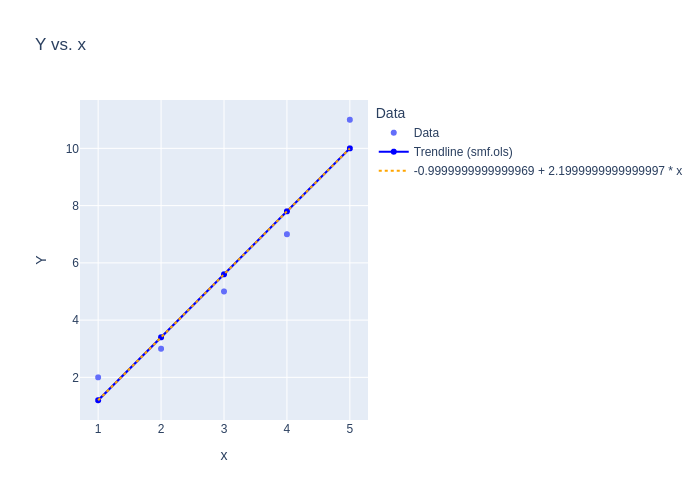

In [61]:
#Q3 
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import numpy as np

# Assuming 'df' is your DataFrame
x = df['x']
Y = df['Y']

# Using statsmodels.api for OLS regression
X = sm.add_constant(x)  # Adds a constant for the intercept term
model = sm.OLS(Y, X).fit()  # Fit OLS model
trendline = model.fittedvalues  # Get the fitted values (trendline)

# Using statsmodels.formula.api for OLS regression (alternative approach)
model_data_specification = smf.ols("Y ~ x", data=df)  # Specify the model
fitted_model = model_data_specification.fit()  # Fit the model

# Print detailed summary and parameters
print(fitted_model.summary())  # Full summary of regression results
print(fitted_model.summary().tables[1])  # Extract second table (ANOVA table)
print(fitted_model.params)  # Coefficients of the fitted model
print(fitted_model.rsquared)  # R-squared value

# Create the scatter plot with plotly.graph_objects
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add trendline from statsmodels.api (OLS)
fig.add_trace(go.Scatter(x=x, y=trendline, mode='lines', name='Trendline (sm.OLS)', line=dict(color='red')))

# Add trendline from statsmodels.formula.api (OLS)
df['Data'] = 'Data'  # Hack to add data to the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')  # Plot using plotly.express
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Trendline (smf.ols)")

# Add custom line based on manually defined beta0 and beta1
beta0 = fitted_model.params['Intercept']  # Intercept from statsmodels.formula
beta1 = fitted_model.params['x']  # Slope from statsmodels.formula

# Create the line over the range of x
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range  # Custom regression line

# Add custom line to the plot (contrast to OLS trendline)
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f'{beta0} + {beta1} * x', 
                line=dict(dash='dot', color='orange'))

# Show the plot
fig.show(renderer="png")


**Q3.** The ordinary least squares (OLS) regression line plotted in Question 1 is the best-fit line through the data. This line is created using the OLS method, which demonstrates how linear regression models are fit to data by minimizing the sum of squared errors between the observed data and the predicted line. Essentially, the OLS method finds the line that best represents the relationship between the variables, making the vertical distance from the data points to the line as small as possible.

In Question 2, a custom regression line is constructed manually using the estimated regression coefficients, B0 (y-intercept) and B1 (slope), which are obtained from the fitted_model in smf.ols. This line represents a mathematical equation for the line of best fit and does not account for random sampling variation.

It is important to note that the 2 lines are identical due to the absence of random sampling variation in this case, as I am working with a fized data set. However, in practice, if there were random sampling variations, there would be small differences between the two lines due to how the coefficients are estimated and the randomness of the data. This is due to the fact that the OLS line is based on the entire dataset and the custom line is based only on a specific set of coefficients that varies depending on the sample. 

**Q4.** Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted_model.fittedvalues are the predicted Y values (outcome) derived from the linear regression model using the estimated regression coefficients B0 ^ (intercept) and B1 ^ (slope). These coefficients can be found in fitted_model.params or fitted_model.params.values, which are listed in fitted_model.summary().tables [1]. Table[1] displays the coefficient estimates along with their statistical details like p-value, standard error, etc. to help evaluate the reliability of the coefficients. Each Y-value is predicted using the equation and the values of the coefficients: $$\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$.






**ChatGPT Summaries Q1-4**
In this session, we explored how to compare two methods for adding trendlines to scatter plots:

Manual Trendline with statsmodels: We used statsmodels.OLS() to fit a regression model to data and then added the fitted trendline manually using go.Figure(). This approach gives you more control over customization.

Automatic Trendline with plotly.express: We used plotly.express.scatter() with the argument trendline='ols' to automatically add a trendline to the plot. This is a simpler and quicker way to generate a trendline.

We also discussed how to simulate multiple datasets and visualize how the trendlines change based on random sampling variation. This process helps demonstrate the differences between the two trendlines and how they behave across various datasets. https://chatgpt.com/share/672c51d3-f498-8006-95c1-97489ed1c099


In this session, we discussed the concept of **fitted_model.fittedvalues** in the context of linear regression. We explored how these fitted values are derived using the estimated regression coefficients (intercept \( \hat{\beta}_0 \) and slope \( \hat{\beta}_1 \)) from the regression model. These coefficients are found in **fitted_model.params** or **fitted_model.params.values** and are displayed in **fitted_model.summary().tables[1]**, which includes details like p-values and standard errors to assess the reliability of the coefficients. We clarified that **fitted values** are predictions based on the regression equation and do not include errors or residuals, as they represent the model's best estimate of \( Y \) given \( X \).
^
https://chatgpt.com/share/672c5233-3218-8006-9e9f-d141c8349d9f

## "Week of Nov04" HW

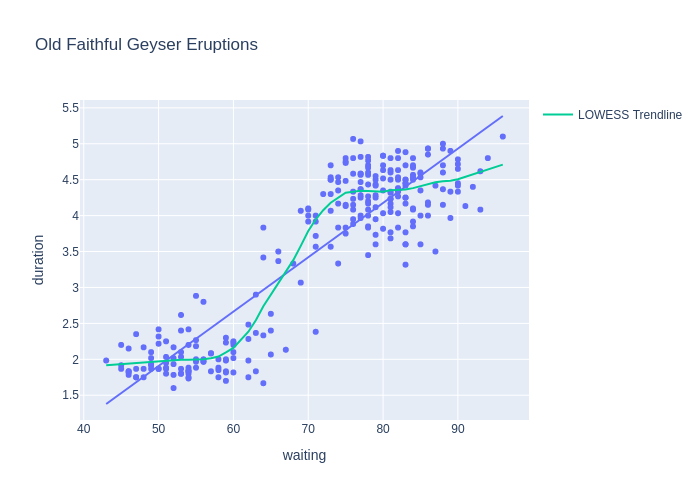

In [55]:

import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") 

In [18]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        22:15:45   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q8.**  Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

Null Hypothesis: There is no linear association between the waiting time and eruption duration (B1=0)

If the p-value for waiting <0.05: Reject H0
If the p-value for waiting >=0.05: Fail to reject H0.

The p-value for the waiting variable is 0.000 <0.05, providing very strong evidence against the null hypothesis which can therefore be rejected.


**Q9.**
In the context of only short wait times, there is evidence in the data for a relationship between duration and wait time in the same manner as in the full data set.

For short_wait_limit = 62, the p-value for waiting is 0.238, which is >0.05. This suggests no evidence against the null hypothesis and that we fail to reject the null hypothesis. In other terms, there is no linear association between the waiting time and eruption duration for time less than 62 minutes. 

For short_wait_limit = 64, the p-value is 0.036, which is <0.05, suggesting moderate evidence against the null hypothesis and that there is some linear association between the waiting time and eruption duration. Therefore, there is some linear association between the waiting time and eruption duration for a short wait limit < 64 minutes. However, since there was no significant relationship for wait times less than 62 minutes, the significant linear relationship appears to emerge between the 62 and 64 minute thresholds.

For short_wait_limit = 66, the p-value for waiting is 0.000 <0.05, indicating very strong evidence against the null hypothesis and that there is a strong linear association between the waiting time and eruption duration for time less than 66 minutes. This strong linear association appears to emerge between the 64 and 66 minute threshold.




Regression Summary for short wait limit < 62:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


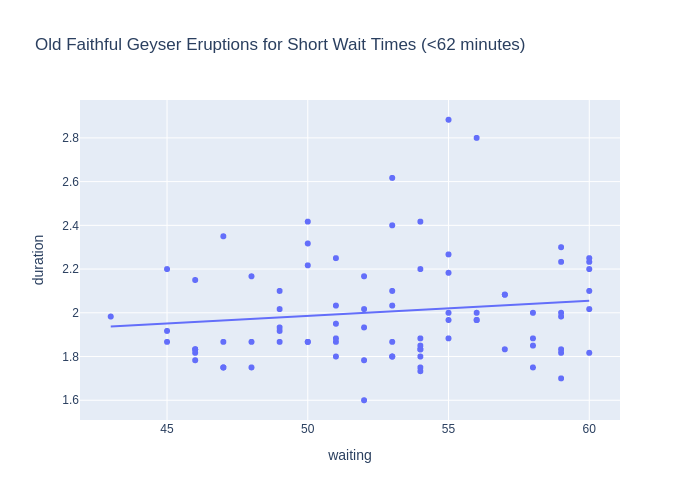


Regression Summary for short wait limit < 64:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


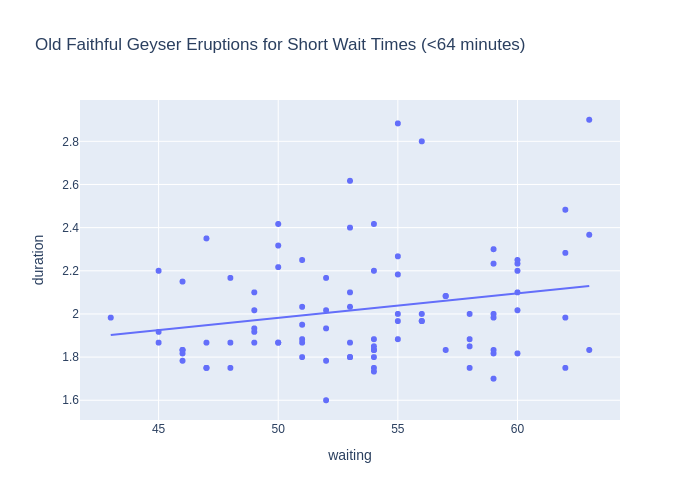


Regression Summary for short wait limit < 66:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


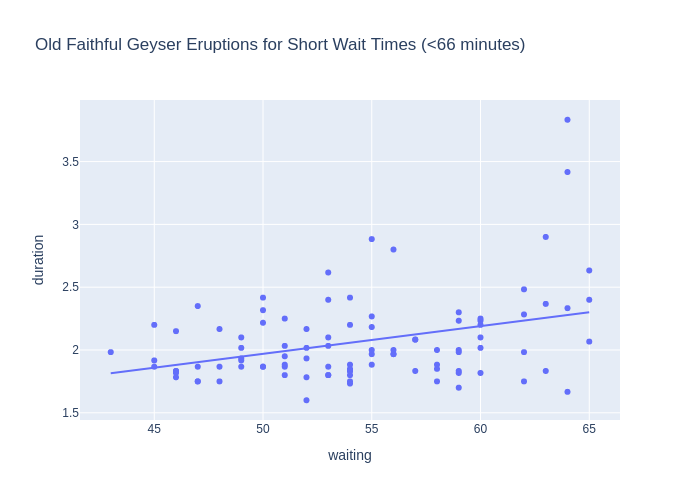

In [20]:
#Q9 
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define limits for short wait times
for short_wait_limit in [62, 64, 66]:
    # Filter data based on the current short wait limit
    short_wait = old_faithful.waiting < short_wait_limit
    short_data = old_faithful[short_wait]

    # Run regression and print summary
    model = smf.ols('duration ~ waiting', data=short_data).fit()
    print(f"\nRegression Summary for short wait limit < {short_wait_limit}:\n")
    print(model.summary().tables[1])  # Table 1 provides coefficients and p-values

    # Create scatter plot with regression trendline
    fig = px.scatter(short_data, x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for Short Wait Times (<{short_wait_limit} minutes)",
                     trendline='ols')
    fig.show(renderer="png")  


**Chat GPT Summary** Here's a summary of our session:

1. **Understanding the Linear Regression Models**:
   - We discussed the difference between continuous and categorical models for analyzing the relationship between **waiting times** and **eruption durations** in the `old_faithful` dataset.
   - Specifically, we focused on dividing the waiting times into two categories: "short" (waiting < 68) and "long" (waiting >= 68).
   - The model we considered for analysis was a **Simple Linear Regression** with an indicator variable for the wait time category, i.e., modeling the eruption duration with an intercept and a coefficient for whether the wait time was long or short.

2. **Model Fitting with `smf.ols`**:
   - We fitted the model using `smf.ols` from the `statsmodels` library, specifying the indicator variable `kind` to separate the data into "short" and "long" categories.
   - We used `C(kind, Treatment(reference="short"))` to set "short" as the reference category for comparison.

3. **Visualization**:
   - We used **box plots** to visualize the difference in eruption durations between the "short" and "long" categories. This helped in understanding the spread and potential differences between the two groups.

4. **Interpretation of Results**:
   - We reviewed how to interpret the regression output, specifically the **coefficient** for the "long" category, which represents the difference in average eruption duration between the "long" and "short" groups.
   - We also discussed how to interpret the **p-value** for the "long" category, which helps to test the null hypothesis of no difference between the two groups.

5. **Conclusion**:
   - Based on the p-value from the model, you could either **reject or fail to reject** the null hypothesis of no significant difference between the two groups.
   - If the p-value is less than 0.05, there is significant evidence against the null hypothesis, indicating a difference between the two groups.

In summary, we worked on creating a regression model to analyze the differences between "short" and "long" wait times, visualized the data using box plots, and interpreted the statistical significance of the model using the regression output.

https://chatgpt.com/share/672d4c92-8ccc-8006-b45d-3862ea042ad3

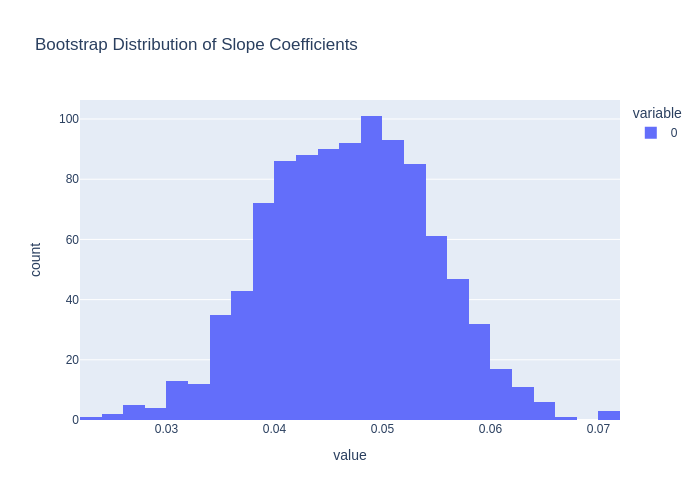

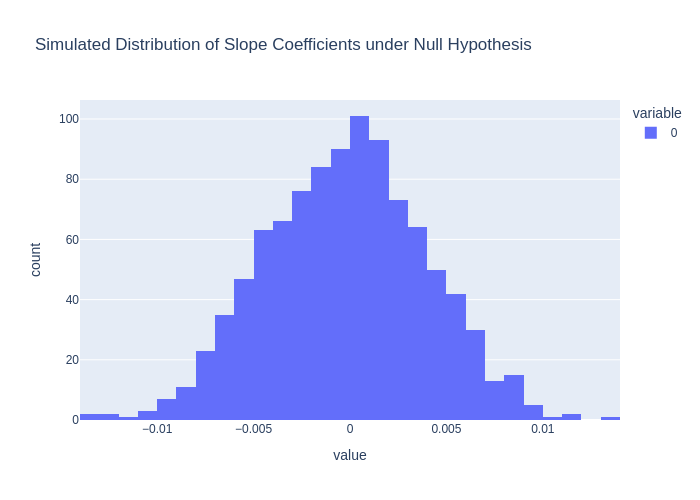

95% Confidence Interval from Bootstrap: [0.03205037 0.06152777]
Proportion of simulated p-values < 0.05: 0.043
Actual p-value from regression on long wait times: 8.314388082540445e-15


In [66]:
##Q10

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Step 1: Filter for long wait times (n=160)
long_wait = old_faithful[old_faithful['waiting'] > 63]  # Long wait times (waiting > 63 minutes)

# Part 1: Bootstrap Sampling and Simple Linear Regression
n_bootstrap = 1000  # Number of bootstrap iterations
slope_bootstrap = []

for _ in range(n_bootstrap):
    # Create a bootstrap sample
    bootstrap_sample = long_wait.sample(n=long_wait.shape[0], replace=True)  # Bootstrap sample with replacement
    
    # Fit the Simple Linear Regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the slope coefficient from the fitted model
    slope_bootstrap.append(model.params['waiting'])

# Visualize the bootstrapped distribution of slope coefficients
fig = px.histogram(slope_bootstrap, nbins=30, title="Bootstrap Distribution of Slope Coefficients")
fig.show(renderer="png")

# Part 2: Simulate Data under the Null Hypothesis (B0=1.65, B1=0, sigma=0.37)
n_simulations = 1000  # Number of simulations
slope_simulated = []
p_values_simulated = []

# Create a copy of the long_wait data to simulate under the null hypothesis
old_faithful_simulation = long_wait.copy()

# Simulate Y values based on the null hypothesis (B1=0)
for _ in range(n_simulations):
    # Simulate the 'duration' values under the null hypothesis (B1=0)
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.shape[0])
    
    # Fit a regression model to the simulated data
    model_sim = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    
    # Collect the slope coefficient and p-value from the fitted model
    slope_simulated.append(model_sim.params['waiting'])
    p_values_simulated.append(model_sim.pvalues['waiting'])

# Visualize the distribution of fitted slopes from simulations
fig_sim = px.histogram(slope_simulated, nbins=30, title="Simulated Distribution of Slope Coefficients under Null Hypothesis")
fig_sim.show(renderer="png")

# Part 3: Confidence Interval and p-value Analysis

# Step 1: Bootstrapped 95% Confidence Interval for the slope
slope_bootstrap_ci = np.percentile(slope_bootstrap, [2.5, 97.5])  # 95% Confidence Interval
print(f"95% Confidence Interval from Bootstrap: {slope_bootstrap_ci}")

# Step 2: Report the proportion of simulated p-values < 0.05 (simulated p-value)
simulated_p_value = np.mean(np.array(p_values_simulated) < 0.05)  # Proportion of simulations with p-value < 0.05
print(f"Proportion of simulated p-values < 0.05: {simulated_p_value}")

# Step 3: Actual p-value from the regression on long wait times
model_long_wait = smf.ols('duration ~ waiting', data=long_wait).fit()
actual_p_value = model_long_wait.pvalues['waiting']
print(f"Actual p-value from regression on long wait times: {actual_p_value}")


**Q11.** 

**Big Picture Differences**

The new model divides the data into two categories: "short" wait times (<68) and "long" wait times (>=68) using the indicator variable "kind." The difference between the new model and the previous models is that the previous models treated "waiting" as a continuous predictor of the eruption duration for the entire dataset or subsets of the data set, like the short or long waits, and assumed a linear relationship between the predictor (waiting time) and the outcome (eruption duration). The new model, however, does not treat the "waiting time" variable as continuous but as categorical and divides it into the categories "short" and "long" wait times and compares the means (average eruption durations) of the two categories. The new model does not predict the eruption duration based on waiting time but compares the short and long categories without assuming a linear relationship. In terms of coefficients, B1 represents the rate of change in eruption for each unit increase in time in the previous models, but in the new model, it represents the difference in eruption between the long and short wait time categories. There is also a difference in the hypothesis: for the new model, you are testing if there is a significant difference in eruption duration between the short and long wait times, but in the previous models, you were only testing if the wait times were a predictor of eruption duration. 


**Evidence Assessment**

Null Hypothesis: There is no difference in eruption duration between "short" and "long" wait times. 

Since the p-value for C(kind)=0.000 <0.05, this indicates very strong evidence against the null hypothesis, and the null hypothesis is rejected. Therefore, there is a statistically significant difference in eruption duration between the "short" and "long" wait time groups. 
 
 







,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


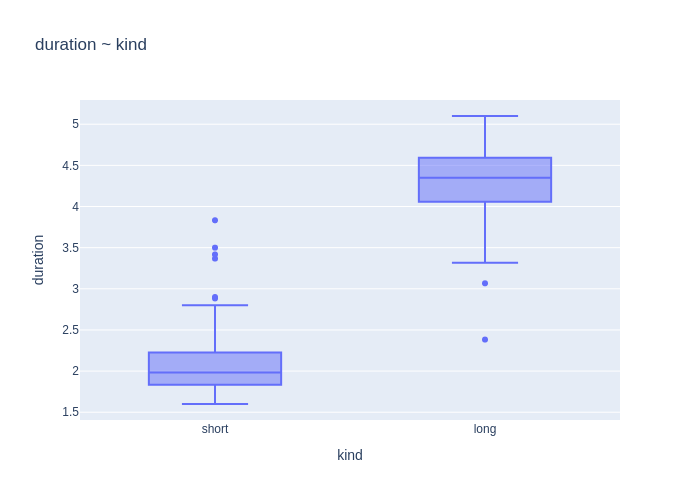

In [54]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**CHAT GPT**

Here’s a concise summary of our session:

1. **Question 10**:
   - We worked on creating bootstrapped sampling distributions for a simple linear regression model, simulating the effects of a null hypothesis for "no linear association," and visualizing the results.
   - We analyzed bootstrapped confidence intervals and p-values to check if the null hypothesis could be rejected, comparing the simulation with actual regression results.

2. **Question 11**:
   - You introduced a new model that divides wait times into two categories ("short" and "long") using an indicator variable called "kind."
   - We discussed how this new model is different from the previous ones:
     - Previous models treated "waiting" as a continuous predictor of eruption duration, whereas the new model treats it as categorical (comparing the means between "short" and "long" wait times).
     - The new model tests for a difference in mean eruption durations between the two categories, while the previous models focused on predicting eruption duration based on waiting time.
   - For the new model, we evaluated the p-value for the null hypothesis of "no difference" between the categories, concluding that the evidence against the null hypothesis was strong (p-value = 0.000), indicating a statistically significant difference between "short" and "long" wait times.

Throughout, we worked on clarifying model specifications and interpreting statistical outputs to ensure accurate understanding and conclusions.

https://chatgpt.com/share/672d637b-6934-8006-8b3f-c2c9ca50cfa7